<a href="https://colab.research.google.com/github/karol10542/MyRepo/blob/main/Kopia_notatnika_classif_mlp_digits_and_faces_emptyWdomu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


**Simple visualization and classification of the digits dataset**
=============================================================

Do a simple MLP classification of 28x28 MNIST dataset

*Marcin Wolter*



In [ ]:
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.


# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)


#print("shape",X_train.shape)

Plot the data: images of digits
-------------------------------

Each data in a 28x28 image

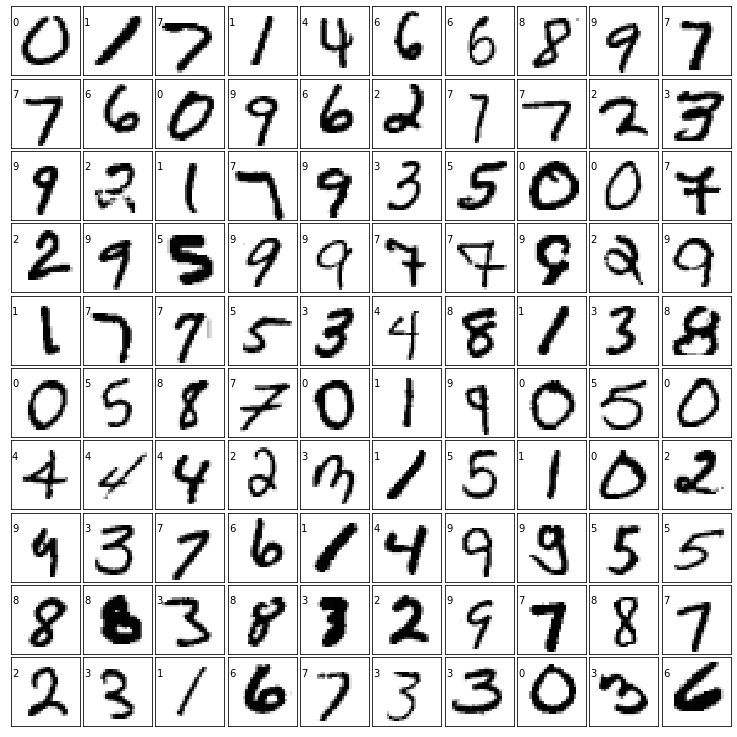

In [ ]:
# leave empty for time beeing

## **Classify with MLP**

In [ ]:

# tu musimy zdefiniować klasyfikator, wytrenowaći sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 
clf = MLPClassifier(hidden_layer_sizes=(100,),activation='relu',learning_rate_init=0.002,early_stopping=True, alpha=0.1, solver='adam',verbose=10,validation_fraction=0.2,max_iter=1000)

print(clf.fit(X_train,y_train))

#score
score=clf.score(X_train,y_train)
print("score:",score)

Z = clf.predict_proba(X_test)[:,1]
print(Z)



Iteration 1, loss = 0.49060531
Validation score: 0.925714
Iteration 2, loss = 0.26830309
Validation score: 0.943571
Iteration 3, loss = 0.22036516
Validation score: 0.951571
Iteration 4, loss = 0.19267839
Validation score: 0.954000
Iteration 5, loss = 0.17207942
Validation score: 0.958429
Iteration 6, loss = 0.15769124
Validation score: 0.957000
Iteration 7, loss = 0.15053240
Validation score: 0.961000
Iteration 8, loss = 0.14299670
Validation score: 0.965429
Iteration 9, loss = 0.13608338
Validation score: 0.967143
Iteration 10, loss = 0.13251719
Validation score: 0.966143
Iteration 11, loss = 0.12758559
Validation score: 0.969286
Iteration 12, loss = 0.12467783
Validation score: 0.969714
Iteration 13, loss = 0.12187935
Validation score: 0.969571
Iteration 14, loss = 0.11862367
Validation score: 0.967571
Iteration 15, loss = 0.11749915
Validation score: 0.968857
Iteration 16, loss = 0.11566892
Validation score: 0.968429
Iteration 17, loss = 0.11602531
Validation score: 0.970143
Iterat

# **Plot loss**
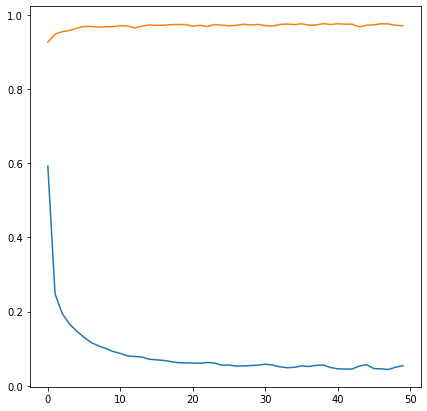

[0.9257142857142857, 0.9435714285714286, 0.9515714285714286, 0.954, 0.9584285714285714, 0.957, 0.961, 0.9654285714285714, 0.9671428571428572, 0.9661428571428572, 0.9692857142857143, 0.9697142857142858, 0.9695714285714285, 0.9675714285714285, 0.9688571428571429, 0.9684285714285714, 0.9701428571428572, 0.9687142857142857, 0.9698571428571429, 0.9675714285714285, 0.9674285714285714, 0.9708571428571429, 0.9681428571428572, 0.9672857142857143, 0.9711428571428572, 0.9717142857142858, 0.97, 0.9678571428571429, 0.969, 0.9727142857142858, 0.9717142857142858, 0.9698571428571429, 0.9684285714285714, 0.9722857142857143, 0.97, 0.9707142857142858, 0.9665714285714285, 0.972, 0.9707142857142858, 0.9724285714285714, 0.9714285714285714]


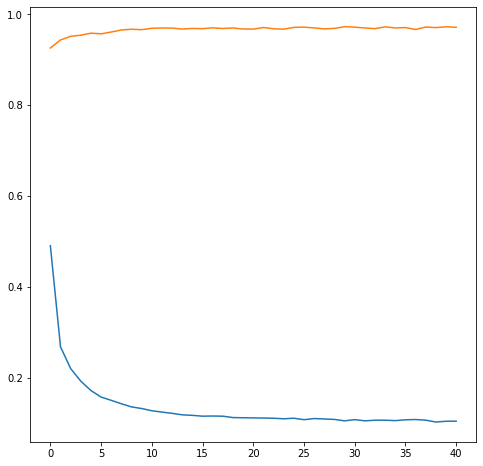

In [ ]:
fig=plt.figure(figsize=(8,8))

plt.plot(clf.loss_curve_)

print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

#**Plot results**
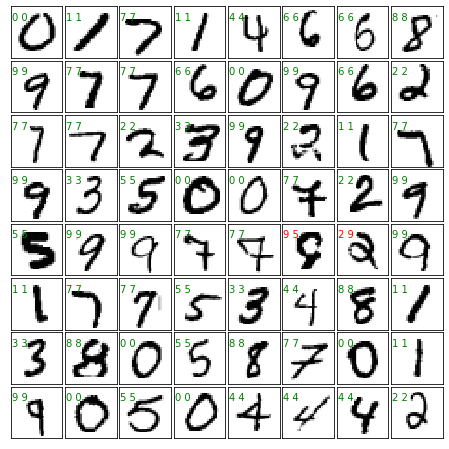

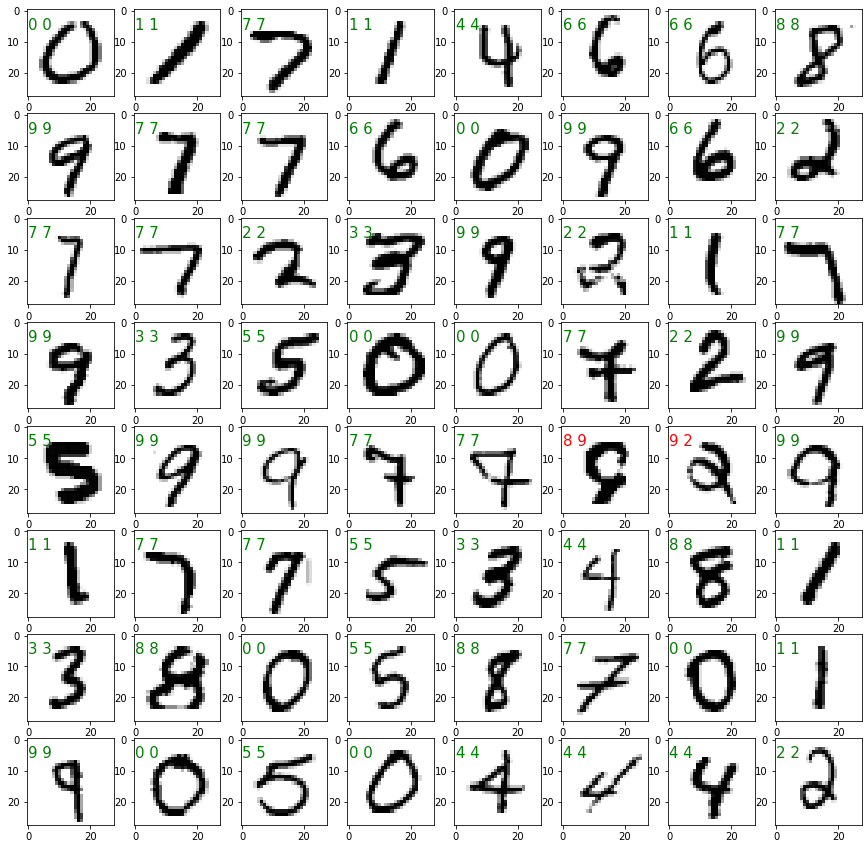

In [ ]:
# Plot the prediction
fig = plt.figure(figsize=(15,15))
predicted = clf.predict(X_test)
# Tu rysujemy cyfry z wynikami
for i in range(64):
  ax= fig.add_subplot(8,8 , i+1)
  ax.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
  if y_test[i] == predicted[i]:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='green',fontsize=15)
    
  else:
      ax.text(0,6,predicted[i] + ' ' +y_test[i],color='red',fontsize=15)
    

# na razie zostawiamy puste

Print the classification report



In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3409
           1       0.98      0.98      0.98      3949
           2       0.97      0.97      0.97      3500
           3       0.95      0.97      0.96      3557
           4       0.98      0.97      0.97      3398
           5       0.97      0.97      0.97      3203
           6       0.98      0.98      0.98      3444
           7       0.96      0.98      0.97      3637
           8       0.98      0.95      0.96      3437
           9       0.97      0.96      0.96      3466

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [ ]:
print(metrics.confusion_matrix(y_test, predicted))



[[3356    0    7    3    0   10   10    7    8    8]
 [   1 3887   20   15    5    1    2    8    9    1]
 [  16    5 3392   19   16    1    5   36    8    2]
 [   0    3   14 3457    0   35    3   21   14   10]
 [   3    6   14    4 3288    1   10   19    5   48]
 [   8    6    4   52    1 3094   14    6    9    9]
 [  11    7    8    2   14   19 3369    1   13    0]
 [   1    9   14   12   11    4    0 3565    0   21]
 [   9   23   20   69    3   16   12   11 3259   15]
 [   8    8    1   25   20   17    2   41   10 3334]]


# **Repeat the same classification for faces**

In [ ]:

####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


Plot the data: images of faces
-------------------------------

Each data in a 32x24 image

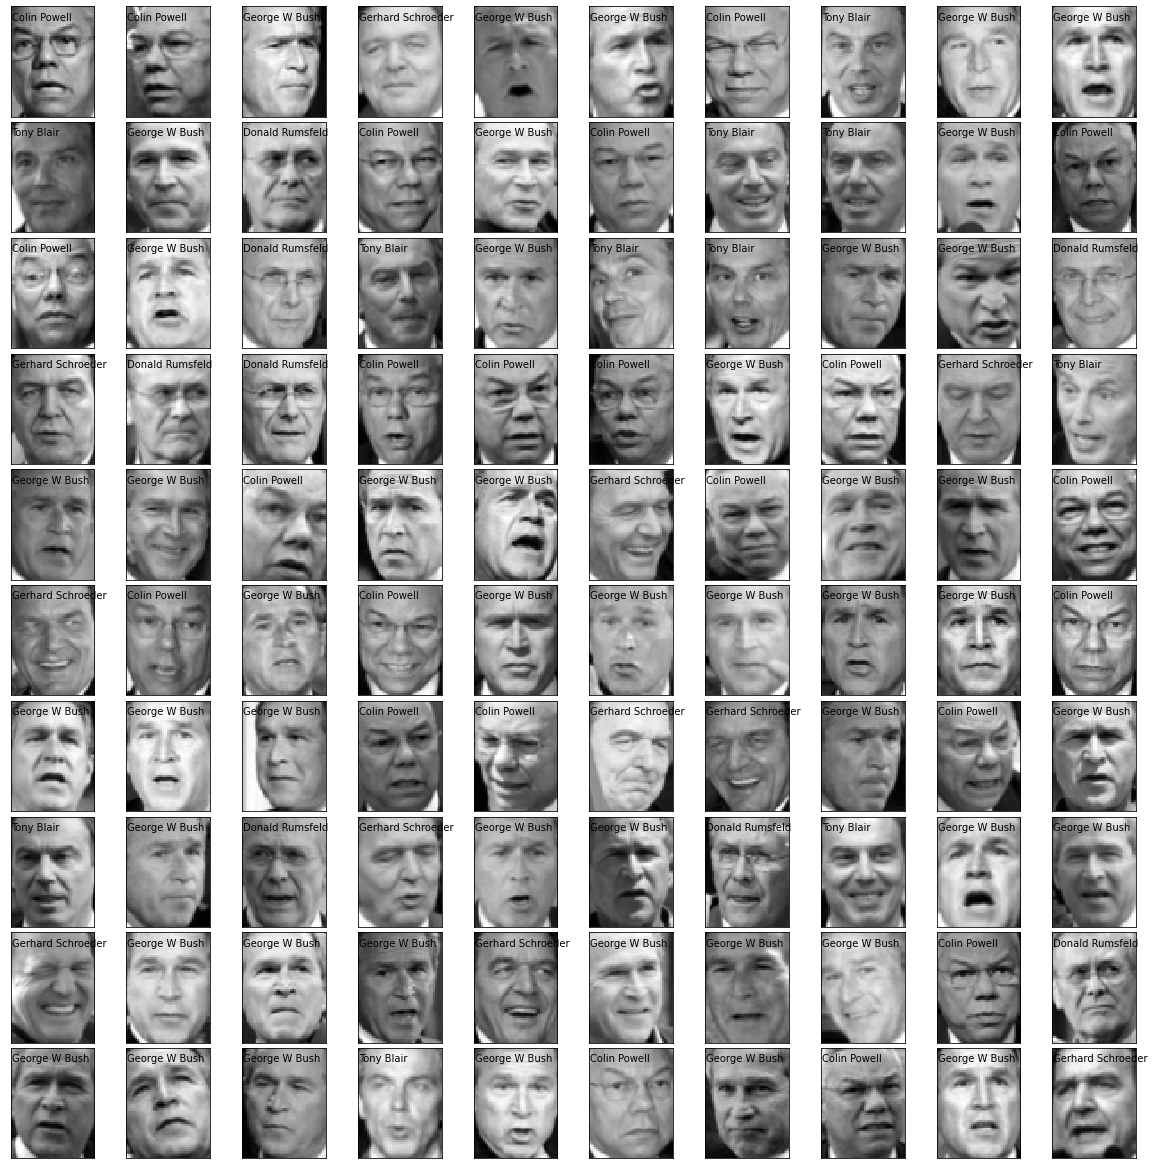

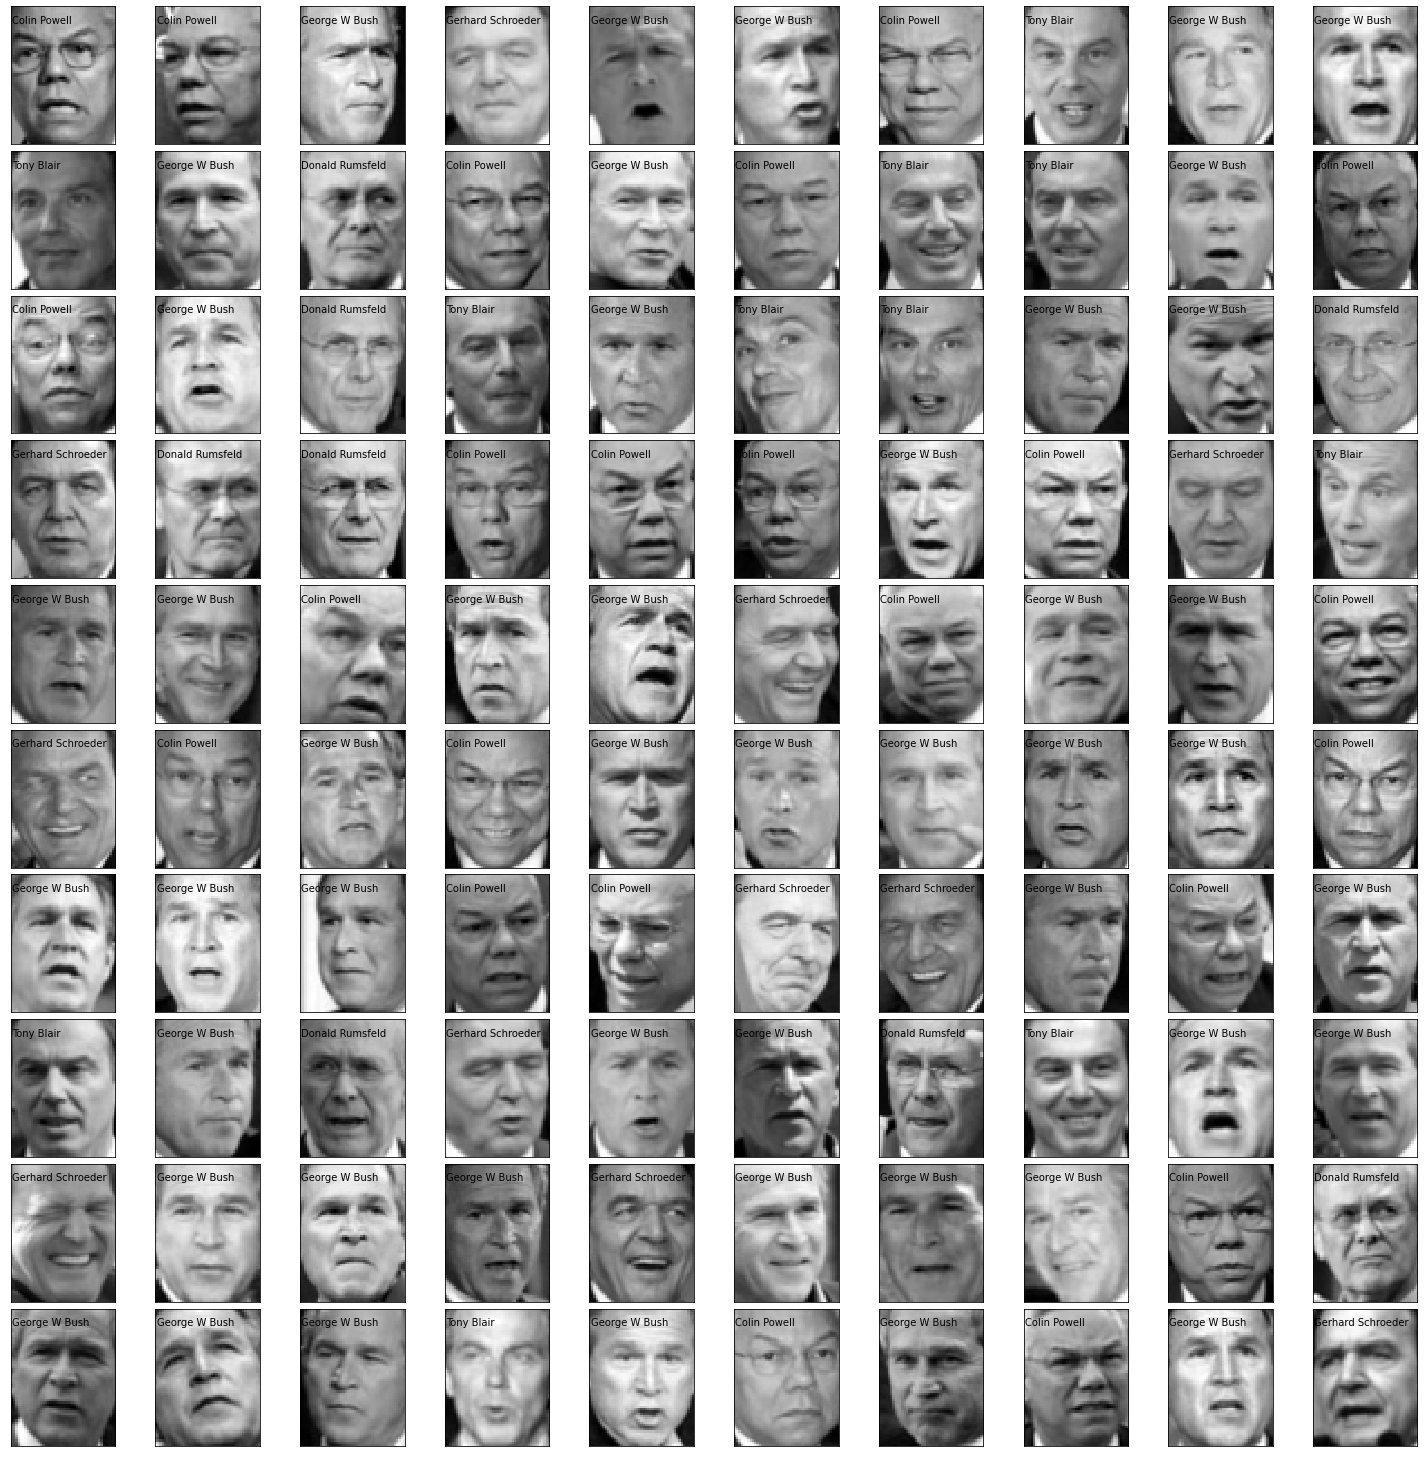

In [ ]:
# tu rysujemy twarze
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

for i in range(100):
  ax=fig.add_subplot(10,10,i+1,xticks=[],yticks=[])
  ax.imshow(X_test[i].reshape(h,w),cmap=plt.cm.gray,interpolation='nearest')
  ax.text(0,7,str(target_names[y_test[i]]))


## **Classify with MLP**

In [ ]:

# train the model
clf = MLPClassifier(hidden_layer_sizes=(100,),activation='relu',learning_rate_init=0.002,early_stopping=True, alpha=0.1, solver='adam',verbose=10,validation_fraction=0.2,max_iter=1000,n_iter_no_change=90)
print(clf.fit(X_train,y_train))

score=clf.score(X_test,y_test)
print("score",score)

Z=clf.predict_proba(X_test)[:,1]
print(Z)



Iteration 1, loss = inf
Validation score: 0.128655
Iteration 2, loss = inf
Validation score: 0.163743
Iteration 3, loss = inf
Validation score: 0.538012
Iteration 4, loss = inf
Validation score: 0.520468
Iteration 5, loss = inf
Validation score: 0.093567
Iteration 6, loss = inf
Validation score: 0.508772
Iteration 7, loss = inf
Validation score: 0.520468
Iteration 8, loss = inf
Validation score: 0.520468
Iteration 9, loss = 64.57071908
Validation score: 0.520468
Iteration 10, loss = 43.52892572
Validation score: 0.660819
Iteration 11, loss = 48.59139418
Validation score: 0.660819
Iteration 12, loss = 40.18921055
Validation score: 0.409357
Iteration 13, loss = 34.83752669
Validation score: 0.450292
Iteration 14, loss = 21.65680580
Validation score: 0.438596
Iteration 15, loss = 19.33699007
Validation score: 0.625731
Iteration 16, loss = 17.42446488
Validation score: 0.649123
Iteration 17, loss = 15.44148674
Validation score: 0.666667
Iteration 18, loss = 11.86210117
Validation score: 0.

# **Plot loss**

# **Plot results**


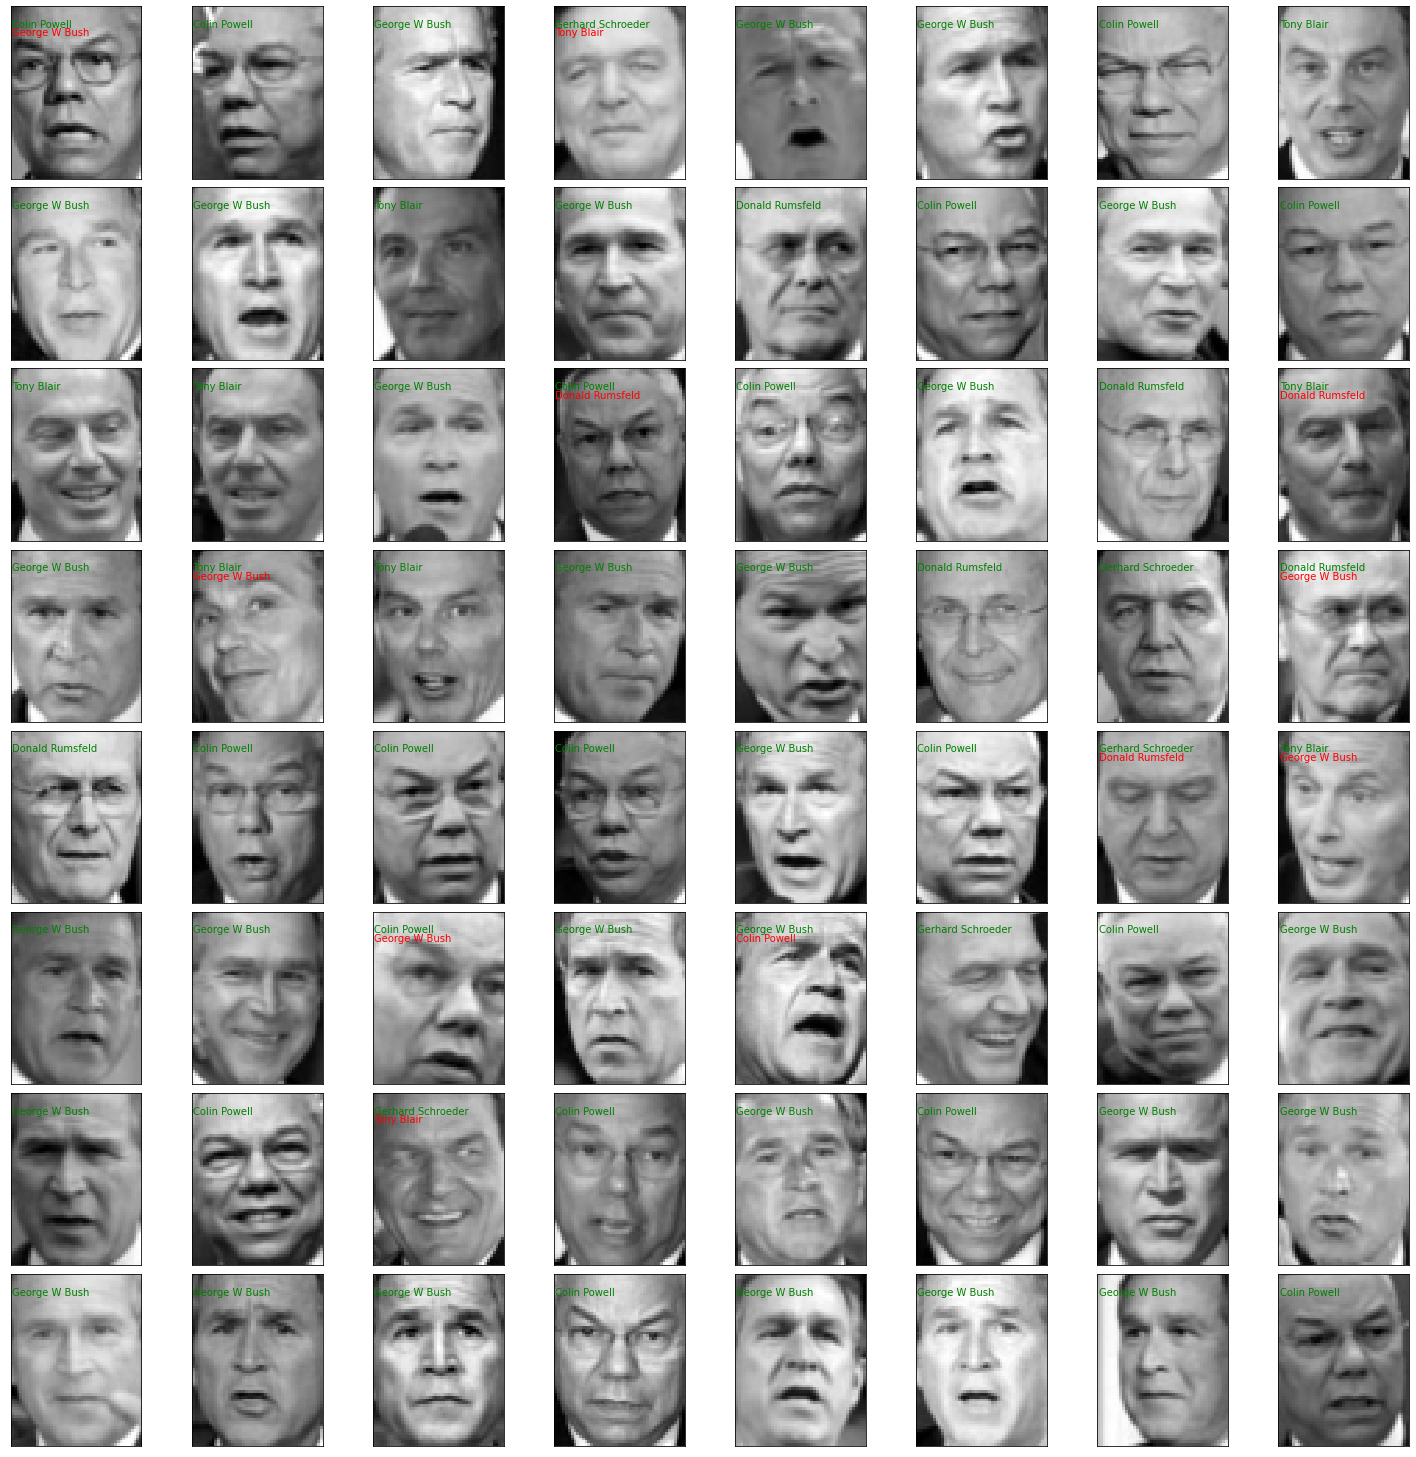

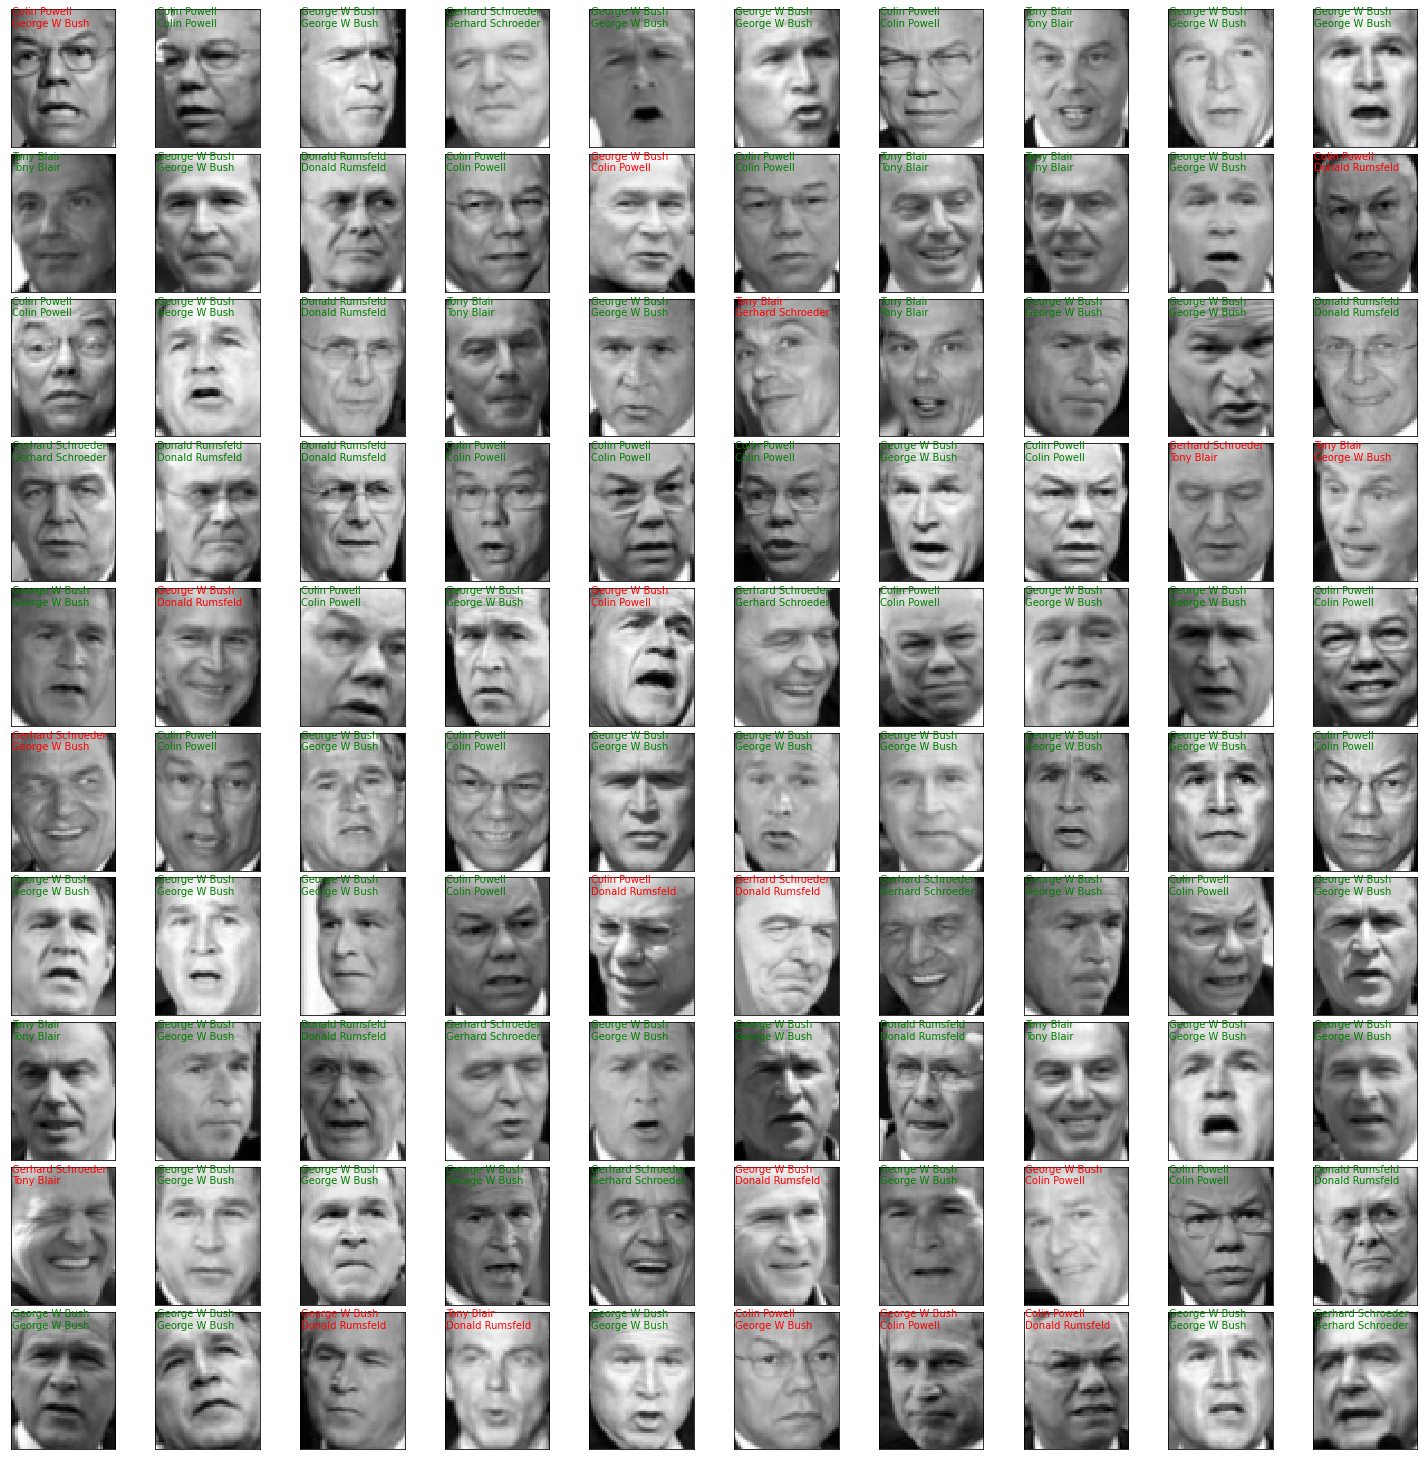

In [ ]:
# Plot the prediction
predicted= clf.predict(X_test)

from matplotlib import pyplot as plt
fig=plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(100):
  ax=fig.add_subplot(10,10,i+1,xticks=[],yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray,interpolation='nearest')

  if y_test[i]==predicted[i]:
    ax.text(0,7,str(target_names[y_test[i]])+ "\n"+str(target_names[predicted[i]]),color='green')
  else:
    ax.text(0,7,str(target_names[y_test[i]])+ "\n"+str(target_names[predicted[i]]),color='red')

Print the classification report



In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        64
           1       0.59      0.81      0.68        32
           2       0.90      0.85      0.87       127
           3       0.71      0.76      0.73        29
           4       0.81      0.76      0.78        33

    accuracy                           0.81       285
   macro avg       0.77      0.79      0.78       285
weighted avg       0.82      0.81      0.81       285



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [ ]:
print(metrics.confusion_matrix(y_test, predicted))



[[ 50   9   3   0   2]
 [  0  26   4   2   0]
 [  6   7 108   4   2]
 [  2   1   2  22   2]
 [  1   1   3   3  25]]
